# [응용2] 캘리포니아 주택 가격

### 데이터 수집 및 탐색

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#fetch data이므로 온라인으로만 fetch가능
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')

df = pd.read_csv('/Users/kimminsoo/Desktop/ML/data/data_선형회귀/california_dataset.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
# 샘플:20640
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
#속성 :8개
df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

### 시각화로 탐색

In [7]:
#데이터프레임으로 변환
x = df.drop(['Price'], axis=1)
y = df['Price']

# 기초 통계량 확인
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=27)

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [10]:
reg = lr.fit(x_train, y_train)

In [11]:
reg.coef_, reg.intercept_

(array([ 4.43946995e-01,  9.73337913e-03, -1.20014445e-01,  7.97856480e-01,
         1.59098524e-07, -3.48723789e-03, -4.23012955e-01, -4.36538635e-01]),
 -37.26341351302502)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(x_test)

In [13]:
def get_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return (mse, rmse, r2)

In [14]:
mse, rmse, r2 = get_score(y_test, y_pred)
print(mse, rmse, r2)

0.5423293447570136 0.736430135693138 0.5886851927020106


In [15]:
# 데이터의 크기
n = len(x_train)

# 독립변수의 갯수
k = len(x_train.columns)

# 수정된 결정 계수
adj_r2 = 1 - ((1-r2) * (n-1) / (n-k-1))
print('Adjusted R2: {:.4f}'.format(adj_r2))

Adjusted R2: 0.5885


In [16]:
coef = pd.Series(data=reg.coef_, index=x_train.columns)
coef.sort_values(ascending=False)

AveBedrms     7.978565e-01
MedInc        4.439470e-01
HouseAge      9.733379e-03
Population    1.590985e-07
AveOccup     -3.487238e-03
AveRooms     -1.200144e-01
Latitude     -4.230130e-01
Longitude    -4.365386e-01
dtype: float64

Text(0, 0.5, 'predicted_price')

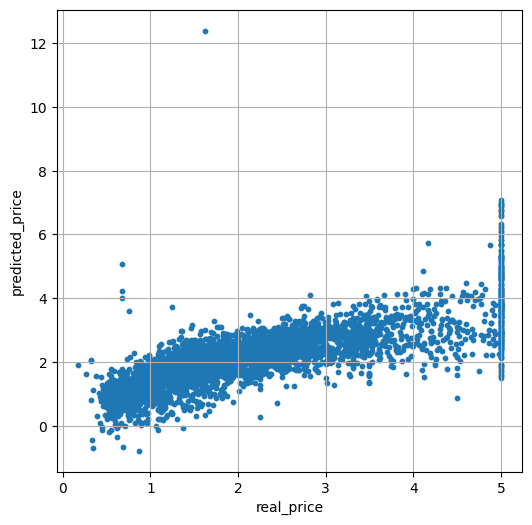

In [21]:
# 독립변수가 여러 개일 때 모델의 성능을 시각화하려면 실제값과 예측값의 분포차이를 그린다.
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred, s= 10)
plt.grid()
plt.xlabel('real_price')
plt.ylabel('predicted_price')